# Create Filters for cylical components

Use the "Run" button to execute the code.

In [1]:
from IPython.display import display, Latex
import jovian
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.multivariate.pca import PCA

In [23]:
 pip install openpyxl

     |████████████████████████████████| 249 kB 6.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


## Data Import 

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))

In [8]:
dataind_seasadj_df = pd.read_csv('Book1.csv')
dataind_seasadj_df


,time,mon_shocks,wacr,iip,reer,cpi,lab_sh
0,01-2012,NaN,8.916511,103.135888,95.09,6.26,49.69
1,02-2012,NaN,8.810440,101.742160,97.78,8.03,49.68
2,03-2012,NaN,9.173009,108.943089,96.39,9.05,49.68
3,04-2012,NaN,8.620363,99.300000,95.02,9.76,49.68
4,05-2012,NaN,8.272151,105.000000,91.80,9.80,49.69
...,...,...,...,...,...,...,...
91,08-2019,NaN,5.377929,126.200000,101.19,3.28,51.89
92,09-2019,NaN,5.335785,122.900000,101.46,3.99,51.97
93,10-2019,NaN,5.087301,124.000000,102.27,4.62,52.05
94,11-2019,NaN,5.042538,128.800000,102.12,5.54,52.12


dataind_seasadj_df.describe()

In [10]:
dataind_seasadj_df.index = pd.date_range(start ="1/2012",end ="12/2019",freq='MS')

## HP Filter

In [30]:
lab_sh_cycle,lab_sh_trend = sm.tsa.filters.hpfilter(dataind_seasadj_df.lab_sh)

In [31]:
lab_sh_decomp = dataind_seasadj_df[["lab_sh"]].copy()
lab_sh_decomp["cycle"] = lab_sh_cycle
lab_sh_decomp["trend"] = lab_sh_trend

In [32]:
lab_sh_decomp["cycle"]

2012-01-01    0.082187
2012-02-01    0.050997
2012-03-01    0.029755
2012-04-01    0.008379
2012-05-01   -0.003233
                ...   
2019-08-01    0.020846
2019-09-01    0.047312
2019-10-01    0.073405
2019-11-01    0.089298
2019-12-01    0.115119
Freq: MS, Name: cycle, Length: 96, dtype: float64

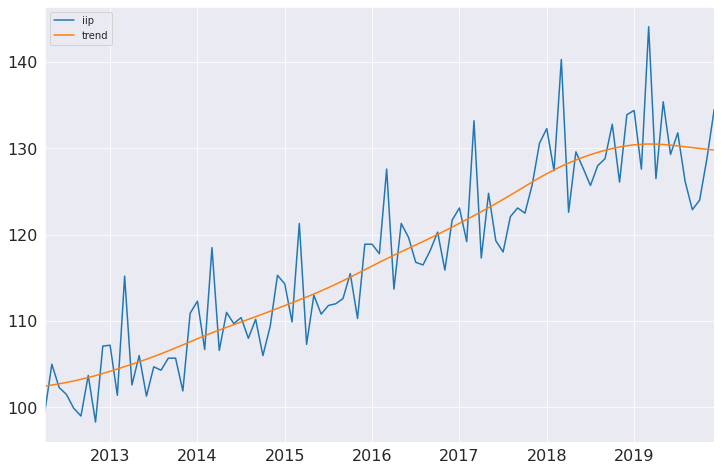

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
iip_decomp[["iip", "trend"]]["4/1/2012":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

## Baxter-King Approximate band-pass filter

In [15]:
bk_cycles = sm.tsa.filters.bkfilter(dataind_seasadj_df[["iip"]])
bk_cycles

,iip_cycle
2013-01-01,2.325191
2013-02-01,3.091389
2013-03-01,2.604684
2013-04-01,0.967411
2013-05-01,-0.649133
...,...
2018-08-01,-1.609484
2018-09-01,-0.667971
2018-10-01,0.141978
2018-11-01,0.824301


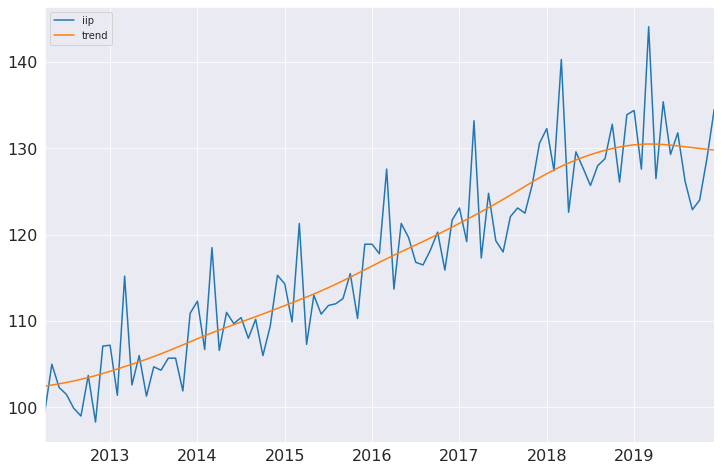

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
iip_decomp[["iip", "trend"]]["4/1/2012":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

<AxesSubplot:>

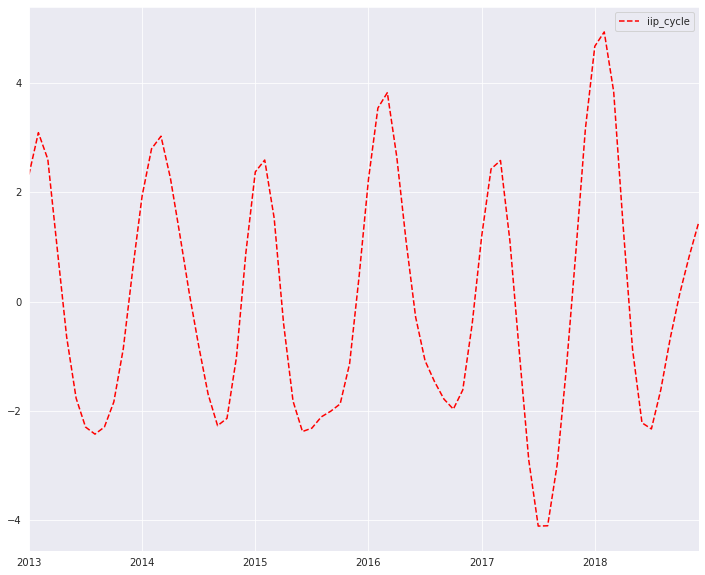

In [17]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
bk_cycles.plot(ax=ax, style=["r--", "b-"])

## Christiano-Fitzgerald approximate band-pass filter
CF filter is appropriate for series that may follow a random walk.

In [18]:
print(sm.tsa.stattools.adfuller(dataind_seasadj_df["iip"])[:3])

(-0.4557115527891448, 0.9003732040855474, 12)


In [33]:
cf_cycles, cf_trend = sm.tsa.filters.cffilter(dataind_seasadj_df["lab_sh"])
print(cf_cycles.head(10))

2012-01-01    0.061066
2012-02-01    0.057955
2012-03-01    0.048386
2012-04-01    0.036900
2012-05-01    0.027284
2012-06-01    0.020870
2012-07-01    0.016688
2012-08-01    0.013017
2012-09-01    0.008915
2012-10-01    0.004621
Freq: MS, Name: lab_sh_cycle, dtype: float64


In [34]:
cf_cycles

2012-01-01    0.061066
2012-02-01    0.057955
2012-03-01    0.048386
2012-04-01    0.036900
2012-05-01    0.027284
                ...   
2019-08-01    0.038009
2019-09-01    0.056956
2019-10-01    0.076985
2019-11-01    0.090761
2019-12-01    0.091613
Freq: MS, Name: lab_sh_cycle, Length: 96, dtype: float64

<AxesSubplot:>

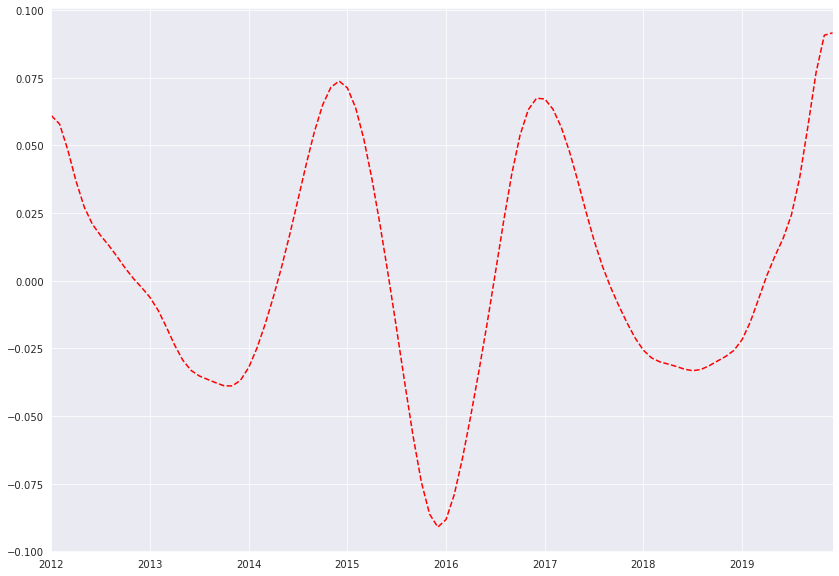

In [35]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
cf_cycles.plot(ax=ax, style=["r--", "b-"])

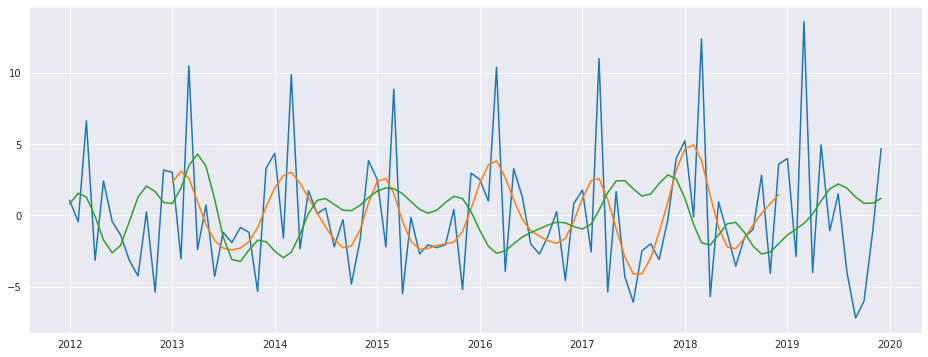

In [28]:
plt.plot(iip_cycle,label="HP filter")
plt.plot(bk_cycles,label="BK filter")
plt.plot(cf_cycles,label="CF filter")


In [36]:
file_name = 'Filter_lab_sh.xlsx'
cf_cycles.to_excel(file_name)

## Cubic Spline

In [1]:
from scipy.interpolate import CubicSpline

## Unobserved Component

In [47]:
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}
iip_uc = sm.tsa.UnobservedComponents(dataind_seasadj_df.iip, **unrestricted_model)

In [48]:
iip_uc_res = iip_uc.fit(method='powell')

Optimization terminated successfully.
         Current function value: 3.084785
         Iterations: 4
         Function evaluations: 308


In [49]:
print(iip_uc_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                           iip   No. Observations:                  175
Model:                    local linear trend   Log Likelihood                -539.837
                   + damped stochastic cycle   AIC                           1091.675
Date:                       Wed, 26 Oct 2022   BIC                           1110.525
Time:                               08:06:08   HQIC                          1099.323
Sample:                           01-01-2008                                         
                                - 07-01-2022                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  3.966e-12      6.700   5.92e-13      1

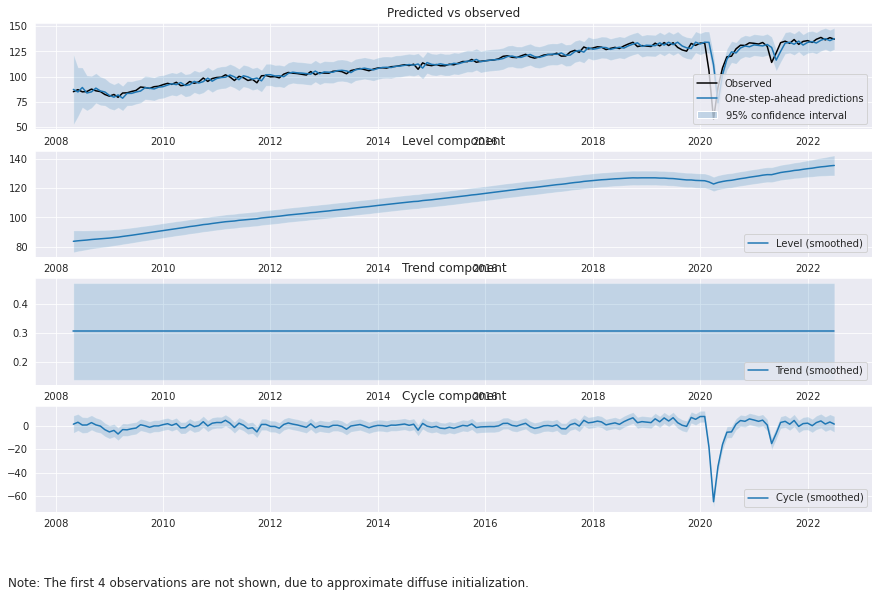

In [50]:
fig = iip_uc_res.plot_components(legend_loc='lower right', figsize=(15, 9));

In [51]:
iip_uc_res.cycle.smoothed

array([ 2.70339863e+00,  2.28840246e+00,  1.76462612e+00,  2.06883763e+00,
        1.49491085e+00,  3.14828821e+00,  7.58510205e-01,  8.11727639e-01,
        2.84221693e+00,  9.04229338e-01, -1.50368258e-01, -3.19256349e+00,
       -5.14301797e+00, -3.82882181e+00, -6.93028914e+00, -3.13798499e+00,
       -3.32844232e+00, -2.41864544e+00, -1.82563025e+00,  1.02728650e+00,
        8.73059937e-02, -1.16532787e+00,  5.94681667e-03,  1.52850431e-03,
        1.11540331e+00,  1.91034851e+00,  4.67215564e-01,  2.03089574e+00,
       -1.65288062e+00, -1.48307484e+00,  1.48517789e+00, -6.59083524e-01,
        2.87425807e-01,  3.61168468e+00, -4.19951494e-02,  2.31482036e+00,
        2.94868598e+00,  2.88470944e+00,  4.80273093e+00,  2.34433392e+00,
       -1.33170784e+00,  2.35507182e+00,  7.20074699e-01, -2.26454104e+00,
       -1.54175796e+00, -5.11379913e+00,  1.29250999e+00,  1.28226752e+00,
       -3.70563517e-01, -4.78898029e-01, -1.97159323e+00,  1.28550367e+00,
        2.52251104e+00,  

In [52]:

pd.DataFrame(iip_uc_res.cycle.smoothed,columns =['UC_cycle'])

,UC_cycle
0,2.703399
1,2.288402
2,1.764626
3,2.068838
4,1.494911
...,...
170,2.853434
171,4.278433
172,1.595358
173,3.377941


In [ ]:
iip_cycles_df = pd.DataFrame(iip_cycle,bk_cycles,cf_cycles,iip_uc_res.cycle.smoothed,columns =['HP_filter','BK_filter','CF_filter','UC_cycle'])

In [ ]:
iip_cycles_df.to_excel('data_filter_iip.xlsx')

## PCA - create a index out of from derived outputs

In [58]:
iip_cycles_df = pd.read_excel('iip_cycles.xlsx')

In [64]:
pca_model = PCA(iip_cycles_df, standardize=False, demean=True)

idx = pca_model.loadings.iloc[:, 0].argsort()

In [62]:
iip_cycles_df=iip_cycles_df.drop(columns=['Index'])

In [65]:
pca_model.factors

,comp_0,comp_1,comp_2,comp_3
0,0.003577,0.005509,0.003133,-0.121675
1,0.002253,0.008024,0.002051,-0.118611
2,0.000346,0.013832,-0.000993,-0.112460
3,0.007100,0.008193,-0.002861,-0.109069
4,0.006291,0.024577,-0.011198,-0.096487
...,...,...,...,...
170,0.017221,-0.019890,0.018223,0.200911
171,0.027995,-0.054206,0.019619,0.240884
172,-0.005429,-0.033293,0.058006,0.293710
173,0.005028,-0.094903,0.092306,0.325882


In [66]:
 pca_model.loadings.iloc[:, 0].argsort()

bnd cycle    0
hp_cycle     2
cf_cycle     3
UC_cycle     1
Name: comp_0, dtype: int64

In [ ]:
pca_model.factors.to_excel('data_pca_cycle.xlsx')